In [17]:
from logprocessor import devs_output_to_list_of_dict
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

def transform_ports(value):
    if value.strip() == 'out_stock1integrator':
        return 'DEVS Stock'
    else:
        return 'NONE'
        
raw_data = devs_output_to_list_of_dict('devs_outputs/stock_to_capacity/stock_to_capacity.out')
data = pd.DataFrame.from_records(raw_data,
                                 columns=['time_in_seconds', 'port', 'value'],
                                 coerce_float=True)
data['value'] = pd.to_numeric(data['value']) 
data['Stock'] = data['port'].apply(transform_ports)
data = data[~data['Stock'].str.contains('NONE')]
data = data[data['time_in_seconds'] < 20]
data['Simulator'] = 'DEVS'
del data['port']


In [18]:
# Datas de SD mas join con datos de DEVS

sd_raw_data = pd.read_csv('sd_outputs/sd_stock_to_capacity.csv')
sd_data = sd_raw_data.melt(id_vars='time_in_seconds',var_name='Stock',value_name='value')
sd_data['Simulator'] = 'SD' 
both_data = sd_data.append(data)
# both_data = both_data.loc[both_data['time_in_seconds'] < 110]


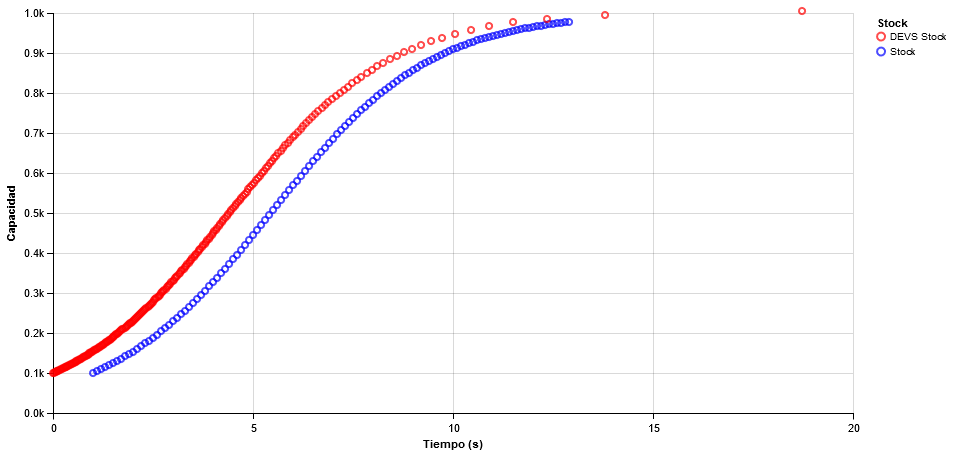

In [20]:
from altair import *


Chart(both_data,max_rows=20000).mark_point().encode(
    x=X('time_in_seconds:Q', axis=Axis(title='Tiempo (s)')),
    y=Y('value:Q',axis=Axis(title='Capacidad'),scale=Scale(domain=(0, 1000))),
    color=Color('Stock:N',scale=Scale(range=[ 'red','blue']))
).configure_cell(width=800, height=400)